**21/01/26 - ATIVIDADE DE FIXAÇÃO**



Crie uma lista com 10 números aleatórios e escreva um código em Python (sem usar bibliotecas prontas primeiro, depois usando o módulo statistics) para calcular a Média e o Desvio Padrão.

In [ ]:
import numpy as np
np.random.seed(50)

lista = np.random.randint(0, 100, 50)
print(lista)

[48 96 11 33 94  4 70 70 22  5  2 95 71 68 78 35 92 91 26 90  6 20 43 31
 49 85 41 64  6 19  2 79 30 35 26 60 66 76 96 67  2 10 51  0 93 93 94  0
 11 30]


In [ ]:
media = np.mean(lista)
desvio_padrao = np.std(lista)
variancia = np.var(lista)

print(f"Média: {media}")
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Variancia: {variancia:.2f}")

Média: 47.72
Desvio padrão: 33.15
Variancia: 1098.88


Nível Intermediário: Gastos com Cartão Corporativo - dados corporativos!


In [1]:
import pandas as pd
import numpy as np


In [2]:
documento = pd.read_csv("/content/202501_CPGF.csv", sep = ';', encoding='latin1')

documento['VALOR TRANSAÇÃO'] = documento['VALOR TRANSAÇÃO'].str.replace(',', '.', regex = False)
documento['VALOR TRANSAÇÃO'] = pd.to_numeric(documento['VALOR TRANSAÇÃO'])

#print(documento['VALOR TRANSAÇÃO'].head(12))

print(documento.head())

   CÓDIGO ÓRGÃO SUPERIOR       NOME ÓRGÃO SUPERIOR  CÓDIGO ÓRGÃO  \
0                  63000  Advocacia-Geral da União         63000   
1                  63000  Advocacia-Geral da União         63000   
2                  63000  Advocacia-Geral da União         63000   
3                  63000  Advocacia-Geral da União         63000   
4                  63000  Advocacia-Geral da União         63000   

                                          NOME ÓRGÃO  CÓDIGO UNIDADE GESTORA  \
0  Advocacia-Geral da União - Unidades com víncul...                  110161   
1  Advocacia-Geral da União - Unidades com víncul...                  110161   
2  Advocacia-Geral da União - Unidades com víncul...                  110161   
3  Advocacia-Geral da União - Unidades com víncul...                  110161   
4  Advocacia-Geral da União - Unidades com víncul...                  110161   

                           NOME UNIDADE GESTORA  ANO EXTRATO  MÊS EXTRATO  \
0  SUPERINTENDENCIA REG. DE ADMIN

In [3]:
media = np.mean(documento['VALOR TRANSAÇÃO'])
desvio = np.std(documento['VALOR TRANSAÇÃO'])
#calculo para descobrir quantos desvio padrão o valor está (acima ou abaixo), sendo 0 a média.
z_score = (documento['VALOR TRANSAÇÃO'] - media) / desvio

#criação e atribuição da nova coluna
documento['Z-Score'] = z_score

#calculo para entender quais são os gastos mais próximos da média
distancia_media = np.abs(documento['VALOR TRANSAÇÃO'] - media)
distancia_media = np.argsort(distancia_media)
top_5 = distancia_media[:5]
documento['VALOR TRANSAÇÃO'][top_5]
valores_proximos = documento['VALOR TRANSAÇÃO'].iloc[top_5]

#calculo para outlier
documento['outlier'] = np.abs(z_score) > 3 # o 3 é utilizado por uma regra estatistica, representando 0,3% dos valores fora do comum


print(f'Média de gastos do cartão corporativo: {media:.2f} reais')
print(f'Desvio padrão de gastos no cartão corporativo: {desvio:.2f} reais')
print(f'Valores próximos:')
print(valores_proximos)
print(f'Valores outliers: {documento['outlier'].value_counts()}')
#print(documento['outlier'].value_counts())
print('Valores Z-score:')
print(z_score.head())

Média de gastos do cartão corporativo: 701.56 reais
Desvio padrão de gastos no cartão corporativo: 1285.82 reais
Valores próximos:
1676     701.00
6089     700.92
6223     700.15
10176    700.00
3652     700.00
Name: VALOR TRANSAÇÃO, dtype: float64
Valores outliers: outlier
False    10285
True       109
Name: count, dtype: int64
Valores Z-score:
0   -0.506459
1   -0.098424
2   -0.402587
3   -0.386178
4    0.815387
Name: VALOR TRANSAÇÃO, dtype: float64


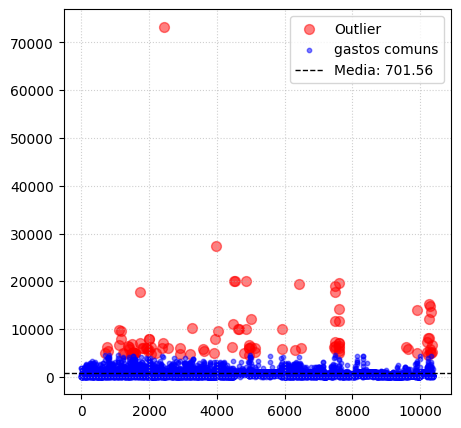

In [4]:
import matplotlib.pyplot as plt

#classificação de pastas (subsets)
normais = documento[documento['outlier'] == False]
outliers = documento[documento['outlier'] == True]

#Começo da plotagem
plt.figure(figsize=(5,5)) #Tamanho do grafico

#identificação das linhas
plt.scatter(outliers.index, outliers['VALOR TRANSAÇÃO'],  color='red',alpha=0.5, label='Outlier', s=50)
plt.scatter(normais.index, normais['VALOR TRANSAÇÃO'], color='blue', alpha=0.5, label = 'gastos comuns', s=10)
plt.axhline(media, color='black', linestyle='--', linewidth=1, label = f'Media: {media:.2f}') #axhline significa Axis Horizontal Line

plt.legend()
plt.grid(True, linestyle=':', alpha=0.6) #alpha é para medir a densidade dos pontos - transparencia
plt.show()

Atividade de intervalo de confiança

In [5]:
from scipy import stats

# Para montar esse calculo é preciso da média, desvio padrão já feitos.
#definimos o intervalor de confiança 95% por ser uma boa pratica na estatistica
confianca = 0.95
alfa = 1 - confianca

#calculo de Z
z = stats.norm.ppf(1 - alfa/2) # Usamos (1 - alfa/2) porque dividimos o erro entre as duas pontas da curva

print(f'Para {confianca*100}% de confiança, o valor de z é {z:.2f}')

Para 95.0% de confiança, o valor de z é 1.96


Calcular o Erro Padrão e a Margem de Erro

Para o intervalo de confiança (95%) temos o valor: R$676.84 até R$726.28


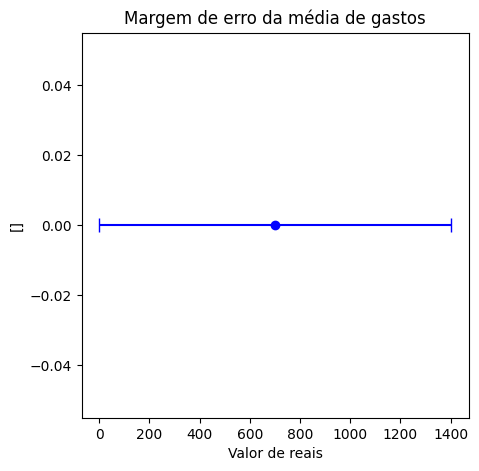

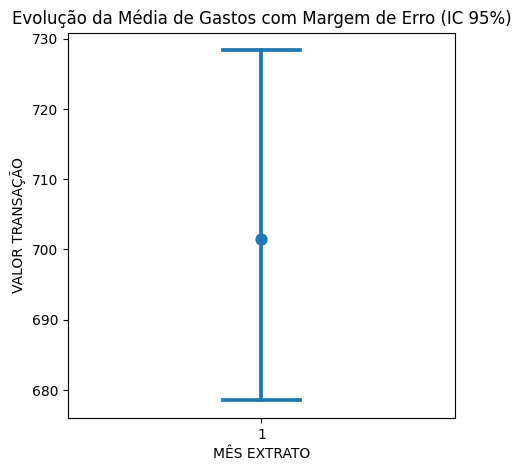

In [31]:
import seaborn as sns
n = len(documento['VALOR TRANSAÇÃO'].to_numpy())

#Erro Padrão mede a incerteza da sua Média
erro_padrao = desvio / np.sqrt(n)
margem_erro = z * erro_padrao

#calcular limites doa valores de gasto
inferior = media - margem_erro
superior = media + margem_erro

print(f'Para o intervalo de confiança (95%) temos o valor: R${inferior:.2f} até R${superior:.2f}')

#Plotagem do gráfico para ficar visual
plt.figure(figsize=(5,5))
plt.errorbar(media, 0, xerr=media, fmt='o', color='blue', capsize=5, label='Média com IC de 95%')
#plt.axhline(media, color='blue', linestyle='--', linewidth=1, label = f'Media: {media:.2f}')
plt.title('Margem de erro da média de gastos')
plt.xlabel('Valor de reais')
plt.ylabel([])#não necessário neste caso
plt.show()

#outra opção de visualização
plt.figure(figsize=(5, 5))
sns.pointplot(data=documento, x=documento['MÊS EXTRATO'], y=documento['VALOR TRANSAÇÃO'], capsize=.2) #no caso so temos jan

plt.title('Evolução da Média de Gastos com Margem de Erro (IC 95%)')
plt.show()